In [84]:
import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import numpy.polynomial.chebyshev as chb
import time

In [383]:
#problem 1

def fun(x):
    return 1.0/(1.0+x**2)

def fun2(x):
    return 1.0+np.exp(-0.5*x**2/(sig**2))

def simple_integrate(fun,a,b,y1,y2,tol):
    #edit 1
    xx=np.linspace(a,b,5)
    x = np.linspace(xx[1],xx[-2],3)
    
    dx=(b-a)/4.0
    y=fun(x)
    neval=len(x)
    
    #edits 2 and 3
    f1=(y1+4*y[1]+y2)/6.0*(b-a)
    f2=(y1+4*y[0]+2*y[1]+4*y[2]+y2)/12.0*(b-a)
    
    myerr=np.abs(f2-f1)
    print([a,b,f1,f2])
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        
        #edits 4 and 5
        f_left,err_left,neval_left=simple_integrate(fun,a,mid,y1,y[1],tol/2.0)
        f_right,err_right,neval_right=simple_integrate(fun,mid,b,y[1],y2,tol/2.0)
        
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval
    
#on any integration this code does 40% less evaluations 
#of f(x) by saving the edge values of f
#we could write code that would do 60% by saving the middle valuation of f.
#integrating to Lorentzian from -20 to 20 to 0.001 precision ordinarily has 295 calls
#integrating to Lorentzian from -20 to 20 to 0.00001 precision ordinarily has 875 calls
#integrating to Lorentzian from -20 to 20 to 0.0000001 precision ordinarily has 3015 calls

In [424]:
#problem 2  
#i couldn't figure the fitting regime so i called chebfit

x = np.linspace(0.5,1,101)
xx = np.linspace(0.5,1,10001)

def cheb(x,n):
    return np.cos(n*np.arccos(x))

def cheb_eval(coeffs,x):
    y = 0
    for i in range(len(coeffs)):
        y = y + coeffs[i]*cheb(x,i)
    return y

coeffs2 = chb.chebfit(xx,log2(xx),62)

err_cheb = np.std(cheb_eval(coeffs2,xx)-log2(xx))
maxe_cheb = np.abs(np.max(cheb_eval(coeffs2,xx)-log2(xx)))
print('Cheb RMS error: ', err_cheb)
print('Cheb max error: ', maxe_cheb)

Cheb RMS error:  7.466385410910268e-14
Cheb max error:  6.750155989720952e-13


In [425]:
#by checking this we can see the largest error we can see the largest error incurred is ~10**-6
#this occurs at 62nd order
coeffs2

array([-2.49615204e-01, -2.44713657e-01,  2.77798291e-01,  3.03688734e-01,
        1.03043983e-01, -1.55710010e-01, -1.48225383e-01,  2.37990811e-02,
        1.43022731e-01,  3.81781057e-02, -8.57320982e-02, -8.45085597e-02,
        4.15199291e-02,  8.50772364e-02,  8.91061062e-03, -7.39035661e-02,
       -4.00813998e-02,  4.75593238e-02,  5.64151895e-02, -1.62589278e-02,
       -6.07789442e-02, -8.70200592e-03,  4.95351211e-02,  3.11407053e-02,
       -3.51737700e-02, -4.16400530e-02,  1.55441514e-02,  4.53459449e-02,
        2.62158621e-03, -4.25403889e-02, -1.64843693e-02,  3.35561176e-02,
        2.79484317e-02, -2.43800653e-02, -3.31896671e-02,  1.35186979e-02,
        3.56768497e-02, -4.09032348e-03, -3.59759431e-02, -2.54081565e-03,
        3.38134984e-02,  8.15366413e-03, -3.26239603e-02, -1.05537898e-02,
        3.17965809e-02,  1.01904513e-02, -3.14978529e-02, -7.61582500e-03,
        3.30341779e-02,  1.72942385e-04, -3.36705435e-02,  1.35525516e-02,
        2.73840419e-02, -

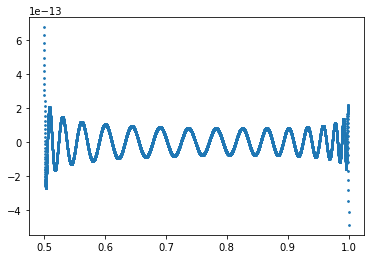

In [426]:
x = np.linspace(0.5,1,10)
plt.scatter(xx,cheb_eval(coeffs2,xx)-log2(xx),s=3)


Legendre RMS error:  2.4897265170864634e-14
Legendre max error:  5.67323965583455e-14


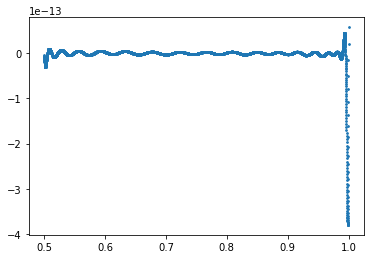

In [427]:
deg = 62
params = np.polynomial.legendre.legfit(x_poly,true,deg)
evals = np.polynomial.legendre.legval(xx_poly,params)

err_leg = np.std(np.polynomial.legendre.legval(xx,params)-log2(xx))
maxe_leg = np.abs(np.max(np.polynomial.legendre.legval(xx,params)-log2(xx)))

print('Legendre RMS error: ', err_leg)
print('Legendre max error: ', maxe_leg)

plt.scatter(xx_poly,evals-log2(xx),s=3)

In [429]:
#the Chebyshev has larger RMS error while the Legendre fit has higher max error.
#this is evident by the plots of the residuals

In [448]:
#problem 3

#we use an implicit solver here since h is very large compared to the stepsize
half_lives = [1.409*10**17,2082240,24120,7.742*10**12,2.377*10**12,5.045*10**10,330350.4,186,1608,1194,1.64*10**-4,7.032*10**8,1.581*10**8,1.195*10**7]

def fun(x,y,hl = [1.409*10**17,2082240,24120,7.742*10**12,2.377*10**12,5.045*10**10,330350.4,186,1608,1194,1.64*10**-4,7.032*10**8,1.581*10**8,1.195*10**7]):
    dydx = np.zeros(len(hl)+1)
    dydx[0] = -y[0]/hl[0]
    for i in range(1,len(hl)):
        dydx[i] = y[i-1]/hl[i-1] - y[i]/hl[i]
    dydx[-1] = y[-2]/hl[-2] 
    return dydx

y0 = np.zeros(15)
y0[0] = 1
t0=0
t1=10**9
times=np.linspace(0,10**9,1001)
t1 = time.time()
ans_stiff = integrate.solve_ivp(fun,[t0,t1],y0, t_eval = times, method = 'Radau')
t2 = time.time()
print(t2-t1)

0.023829936981201172


In [432]:
ans_stiff.y

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.99999993e-01, 9.99999993e-01, 9.99999993e-01],
       [0.00000000e+00, 6.92950500e-13, 1.35288342e-12, ...,
        1.47762571e-11, 1.47762577e-11, 1.47762583e-11],
       [0.00000000e+00, 6.15669110e-15, 1.38629779e-14, ...,
        1.71163165e-13, 1.71163172e-13, 1.71163180e-13],
       ...,
       [0.00000000e+00, 2.40413808e-43, 6.74790487e-37, ...,
        3.25899572e-20, 3.26040189e-20, 3.26180848e-20],
       [0.00000000e+00, 6.30247319e-47, 1.06308007e-39, ...,
        2.34313630e-21, 2.34416179e-21, 2.34518758e-21],
       [0.00000000e+00, 1.47123608e-50, 1.32140129e-42, ...,
        2.66535213e-21, 2.66692968e-21, 2.66850784e-21]])

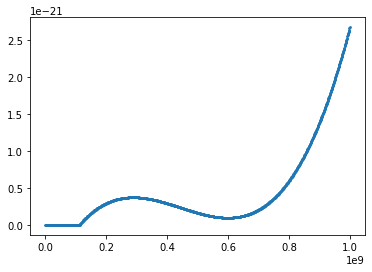

In [449]:
#ratio of Pb206 to U238. The derivative should be strictly positive but alas.
#the region of zero Pb206 makes sense since it takes time for products to progres down the decay chain.
plt.scatter(ans_stiff.t, ans_stiff.y[14],s=3)

<ipython-input-433-ed66bea77daa>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(ans_stiff.t, ans_stiff.y[3]/ans_stiff.y[4],s=3)


(0.0, 50000000.0)

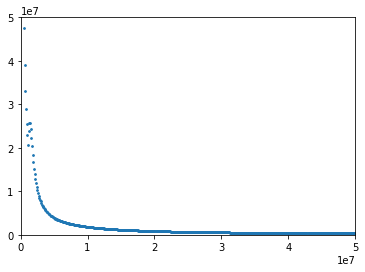

In [433]:
#ratio of Th230 to U234
plt.scatter(ans_stiff.t, ans_stiff.y[3]/ans_stiff.y[4],s=3)
plt.xlim((0,0.5*10**8))
plt.ylim((0,0.5*10**8))
